# 📦 Imports

In [1]:
import os
# dataframes & arrays
import pandas as pd
import numpy as np
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# clear warnings
import warnings
warnings.filterwarnings("ignore")
# request
import requests
# metrics
from sklearn import metrics
# scripts
import wrangle as w
import env

# ≝ Default Settings

In [2]:
# Pandas
pd.set_option('display.max_colwidth', None)
# Matplotlib
plt.style.use('fivethirtyeight')

# 🗂️ Acquire & Prepare

In [3]:
df = w.get_curriculum_data()

# logs contains cohort data
logs = pd.read_csv('logs.csv')

File exists, pulling from system. (logs.csv)
File exists, pulling from system. (data.txt)


In [4]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
datetime,,,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,Web Dev 2


In [5]:
df.shape

(900223, 10)

In [6]:
w.summarize(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,dtype
9,program_id,4,"[Web Dev 1, Web Dev 2, nan, Web Dev 4, Data Science]",52893,object
7,created_at,37,"[2016-06-14 19:52:26, 2018-01-08 13:59:10, 2017-09-27 20:22:41, 2016-10-26 02:34:05, 2017-03-28 00:33:12, 2017-06-05 20:12:10, nan, 2016-07-18 19:06:27, 2016-09-26 15:58:53, 2017-02-06 17:49:10, 2018-03-05 14:22:11, 2018-05-25 22:25:57, 2018-07-23 15:02:25, 2018-09-17 19:09:51, 2018-11-05 15:26:37, 2018-12-06 17:04:19, 2019-01-20 23:18:57, 2019-03-18 20:35:06, 2019-05-28 18:41:05, 2019-07-15 16:57:21, 2019-08-20 14:38:55, 2019-09-16 13:07:04, 2019-11-04 18:27:07, 2020-01-13 21:17:08, 2020-02-03 19:31:51, 2020-02-24 15:39:33, 2020-03-23 17:52:16, 2020-05-26 19:22:44, 2020-07-13 18:32:19, 2020-07-20 19:04:00, 2020-09-21 18:06:27, 2020-11-02 20:43:58, 2020-12-07 16:58:43, 2020-12-07 15:20:18, 2021-01-20 21:31:11, 2021-03-15 19:57:09, 2021-03-15 18:18:20, 2021-04-12 18:07:21]",52893,object
8,updated_at,37,"[2016-06-14 19:52:26, 2018-01-08 13:59:10, 2017-09-27 20:22:41, 2016-10-26 14:30:19, 2017-03-28 00:33:12, 2017-06-05 20:12:10, nan, 2016-07-18 19:06:27, 2016-09-26 15:58:53, 2017-02-06 17:49:10, 2018-03-05 14:22:11, 2018-05-25 22:25:57, 2018-07-23 15:02:25, 2018-09-17 19:09:51, 2018-11-05 15:26:37, 2018-12-06 17:04:19, 2019-01-20 23:18:57, 2019-03-18 20:35:06, 2019-05-28 18:41:05, 2019-07-15 16:57:21, 2019-08-20 14:38:55, 2019-09-16 13:07:04, 2019-11-04 18:27:07, 2020-01-13 21:17:08, 2020-02-03 19:31:51, 2020-07-29 18:41:13, 2020-03-23 17:52:16, 2020-05-26 19:22:44, 2020-07-13 18:32:19, 2020-09-30 15:54:46, 2020-09-21 18:06:27, 2020-11-02 20:43:58, 2020-12-07 16:58:43, 2020-12-07 15:20:18, 2021-01-20 21:31:11, 2021-03-15 19:57:09, 2021-03-15 18:18:20, 2021-04-12 18:07:21]",52893,object
5,start_date,44,"[2015-09-22, 2018-01-08, 2017-09-27, 2014-02-04, 2016-10-26, 2017-03-27, 2017-06-05, nan, 2016-05-23, 2016-07-18, 2016-09-26, 2015-06-05, 2014-10-20, 2016-03-08, 2017-02-06, 2018-03-05, 2014-06-04, 2015-03-30, 2016-01-20, 2018-05-29, 2018-07-23, 2018-09-17, 2015-02-03, 2018-11-05, 2019-01-22, 2019-03-18, 2019-05-28, 2019-07-15, 2019-08-19, 2019-09-16, 2019-11-04, 2020-01-13, 2020-02-03, 2020-02-24, 2020-03-23, 2014-11-18, 2020-05-26, 2020-07-13, 2020-07-20, 2020-09-21, 2020-11-02, 2020-12-07, 2021-01-25, 2021-03-15, 2021-04-12]",52893,object
6,end_date,45,"[2016-02-06, 2018-05-17, 2018-02-15, 2014-04-22, 2017-03-09, 2017-07-20, 2017-09-22, nan, 2016-09-15, 2016-11-10, 2017-02-02, 2015-10-06, 2015-01-18, 2016-06-30, 2017-05-25, 2018-07-19, 2014-08-22, 2015-07-29, 2016-05-12, 2018-10-11, 2018-11-29, 2019-02-08, 2015-05-26, 2019-04-03, 2014-02-04, 2019-06-04, 2019-07-30, 2019-10-08, 2019-12-11, 2020-01-30, 2020-02-27, 2020-04-17, 2020-06-23, 2020-07-07, 2020-07-29, 2020-08-20, 2015-02-24, 2020-11-10, 2021-01-12, 2021-01-21, 2021-03-30, 2021-05-04, 2021-06-08, 2021-07-19, 2021-09-03, 2021-10-01]",52893,object
4,name,47,"[Hampton, Teddy, Sequoia, Arches, Niagara, Pinnacles, Quincy, nan, Kings, Lassen, Mammoth, Glacier, Denali, Joshua, Olympic, Ulysses, Badlands, Apollo, Ike, Voyageurs, Wrangell, Xanadu, Franklin, Yosemite, Staff, Zion, Andromeda, Betelgeuse, Ceres, Bayes, Deimos, Europa, Fortuna, Curie, Apex, Ganymede, Everglades, Hyperion, Darden, Bash, Jupiter, Kalypso, Luna, Easley, Marco, Neptune, Florence, Oberon]",52893,object
2,cohort_id,48,"[8, 22, 21, 1, 16, 18, 19, -1, 13, 14, 15, 7, 4, 12, 17, 23, 2, 9, 11, 24, 25, 26, 6, 27, 28, 29, 31, 32, 33, 34, 51, 52, 53, 55, 56, 57, 5, 58, 59, 61, 62, 132, 134, 133, 135, 138, 137, 139]",0,int64
1,user_id,981,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]",0,int64


In [7]:
w.summarize_df(df)

=====   SHAPE   =====
(900223, 10)
=====   INFO   =====
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   path        900222 non-null  object
 1   user_id     900223 non-null  int64 
 2   cohort_id   900223 non-null  int64 
 3   ip          900223 non-null  object
 4   name        847330 non-null  object
 5   start_date  847330 non-null  object
 6   end_date    847330 non-null  object
 7   created_at  847330 non-null  object
 8   updated_at  847330 non-null  object
 9   program_id  847330 non-null  object
dtypes: int64(2), object(8)
memory usage: 75.5+ MB
None
=====   DESCRIBE   =====
|           |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
|:----------|--------:|---------:|---------:|------:|------:|------:|------:|------:|
| user_id   |  900223 | 458.826  | 249.297  |     1 | 

### Anomalyous Behavior # 1
    no cohort ID should be a null
    
    Also missing values in name and program id -- this is likely the same group

# 🗺️ Explore

### Start by seeing which programs have the most activity

In [8]:
df.program_id.value_counts()

program_id
Web Dev 2       713365
Data Science    103412
Web Dev 1        30548
Web Dev 4            5
Name: count, dtype: int64

### Questions

    1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
        Answer:
        - Javascript I is most popular for the Web Devs
        - Classification overview would be for Data Science 

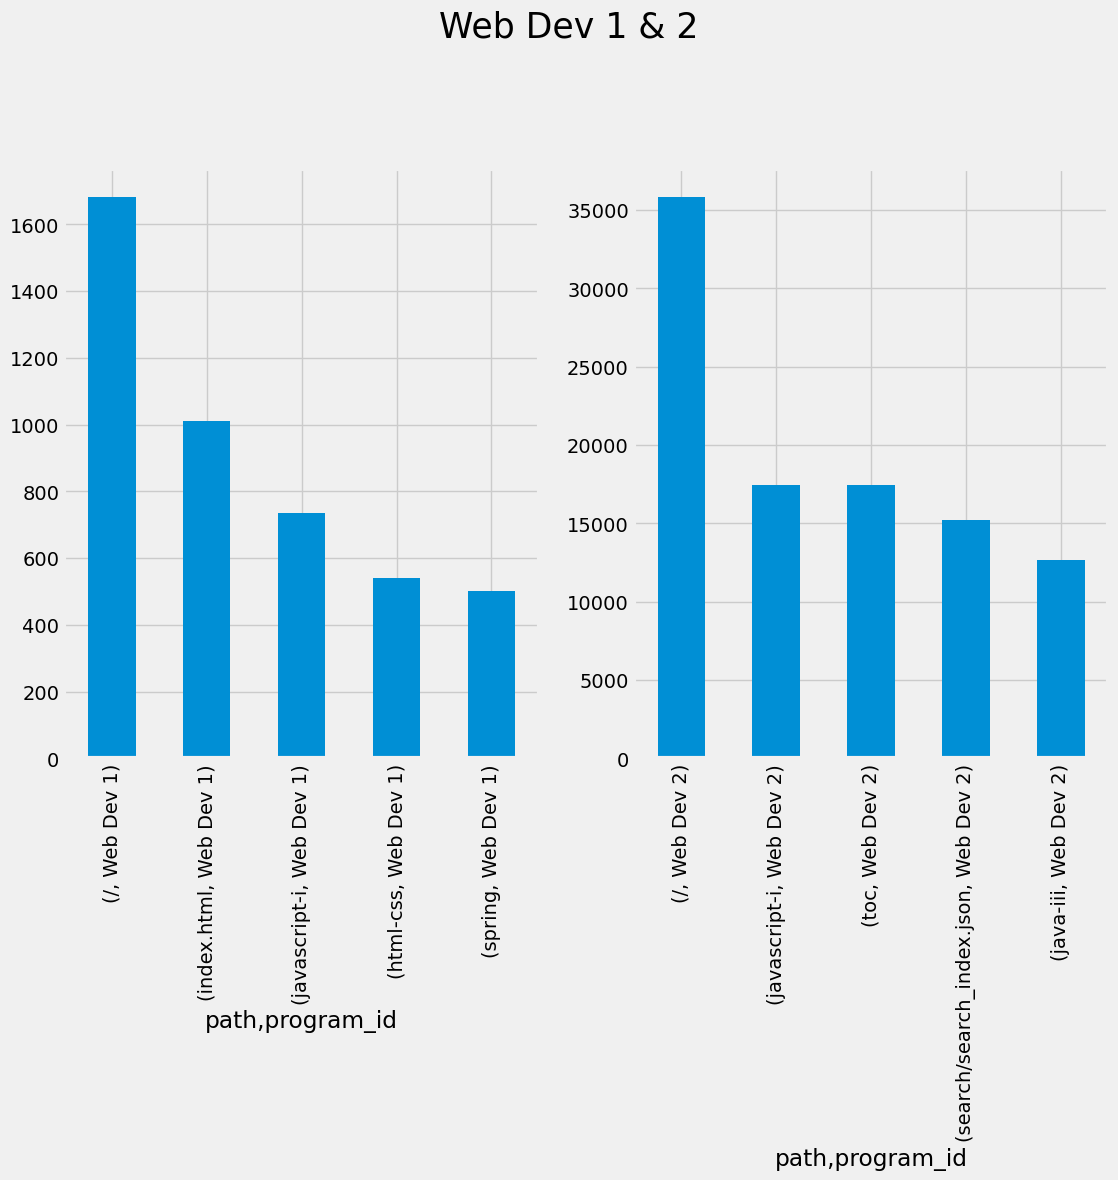

In [126]:
plt.figure(figsize=(12,16))
plt.subplot(2,2,1)
df[df.program_id == 'Web Dev 1'].groupby(['path','program_id'])['path'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.subplot(2,2,2)
df.groupby(['path','program_id'])['path'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.suptitle('Web Dev 1 & 2',size=25)
plt.show()

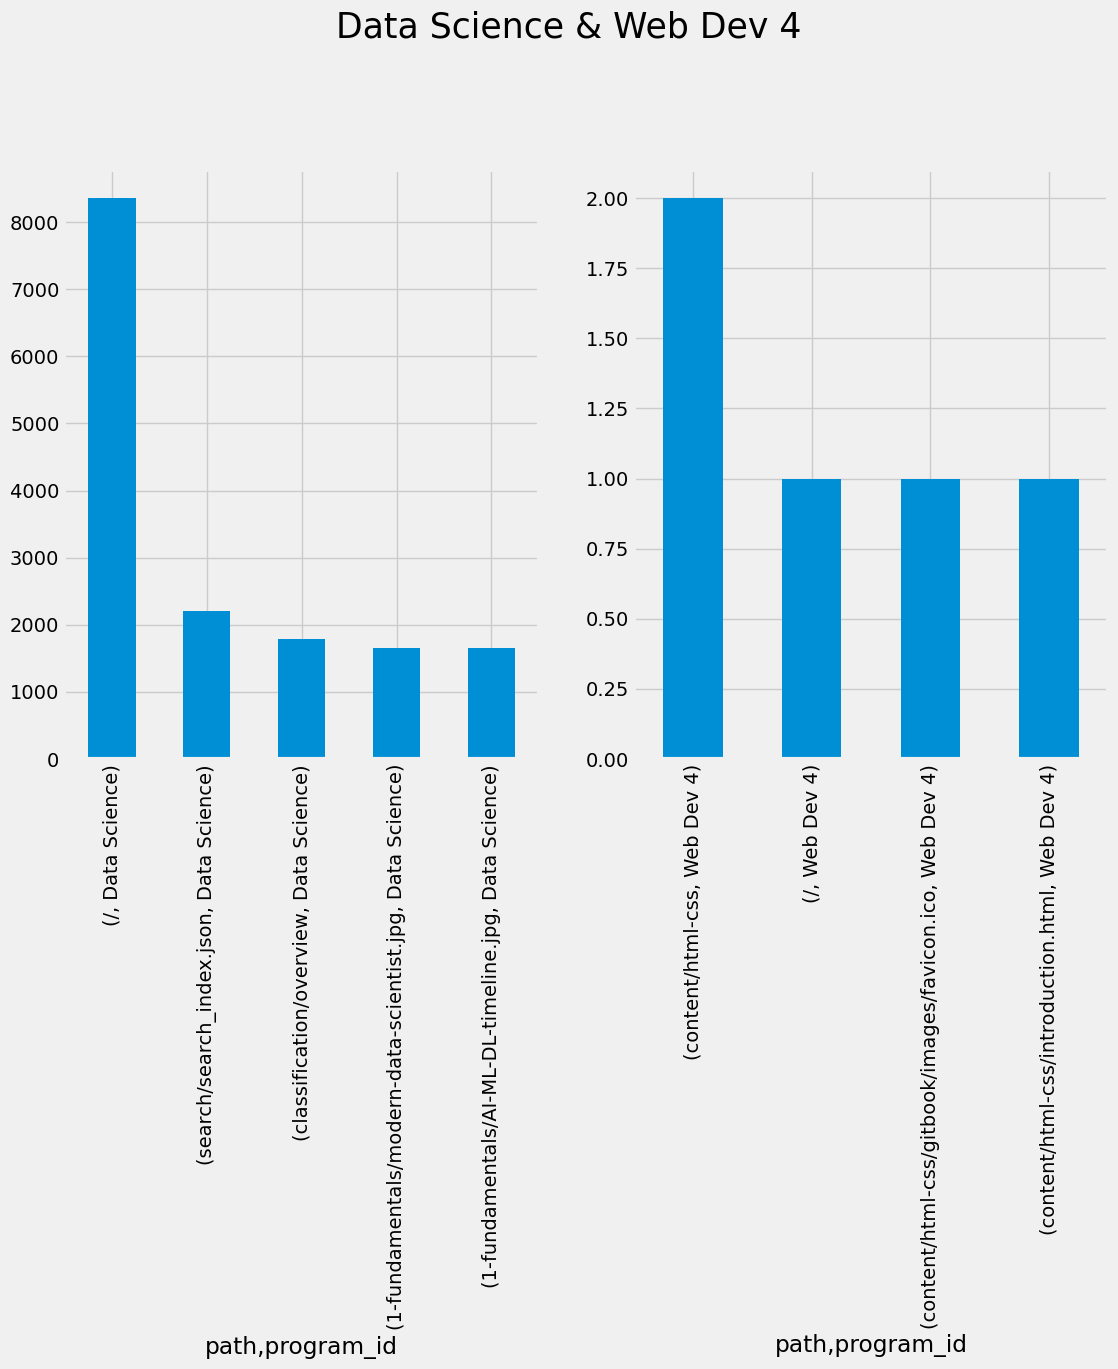

In [127]:
plt.figure(figsize=(12,16))
plt.subplot(2,2,1)
df[df.program_id == 'Data Science'].groupby(['path','program_id'])['path'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.subplot(2,2,2)
df[df.program_id == 'Web Dev 4'].groupby(['path','program_id'])['path'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.suptitle('Data Science & Web Dev 4',size=25)
plt.show()

    2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?